In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
 'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
 'C' : np.random.randn(8),
 'D' : np.random.randn(8)});df

,A,B,C,D
0,foo,one,-0.555187,-1.168101
1,bar,one,-0.163606,2.057182
2,foo,two,0.057276,-0.331880
3,bar,three,0.032279,-0.513276
4,foo,two,1.615366,-0.550398
5,bar,two,2.218731,-0.122280
6,foo,one,-2.017071,-0.385930
7,foo,three,-0.878186,-0.951041


In [3]:
grouped = df.groupby('A') ; grouped

In [4]:
grouped = df.groupby(['A', 'B'])

In [5]:
grouped

In [3]:
## group by index
lst = [1,2,3,1,2,3] #this one will be the index
s = pd.Series([1,2,3,10,20,30], lst)

In [4]:
s

1     1
2     2
3     3
1    10
2    20
3    30
dtype: int64

In [5]:
grouped = s.groupby(level=0)

In [6]:
grouped.first()

1    1
2    2
3    3
dtype: int64

In [12]:
grouped.last()

1    10
2    20
3    30
dtype: int64

In [13]:
grouped.sum()

1    11
2    22
3    33
dtype: int64

### groupy sorting

In [17]:
df3 = pd.DataFrame({'X': ['A','B','C','B'] , 'Y': [1,4,3,2]})

In [19]:
df3.groupby('[X]').sum()

,Y
X,
A,1
B,6
C,3


In [20]:
df3.groupby(['X'], sort= False).sum()

,Y
X,
A,1
B,6
C,3


In [21]:
df3.groupby('X').get_group('A')

,X,Y
0,A,1


In [22]:
df3.groupby('X').get_group('B')

,X,Y
1,B,4
3,B,2


In [25]:
grpd = df3.groupby('X')

### Group Attribute

In [26]:
df.groupby('A').groups

{'bar': Int64Index([1, 3, 5], dtype='int64'),
 'foo': Int64Index([0, 2, 4, 6, 7], dtype='int64')}

In [27]:
grouped = df.groupby(['A','B'])

In [28]:
grouped.groups

{('bar', 'one'): Int64Index([1], dtype='int64'),
 ('bar', 'three'): Int64Index([3], dtype='int64'),
 ('bar', 'two'): Int64Index([5], dtype='int64'),
 ('foo', 'one'): Int64Index([0, 6], dtype='int64'),
 ('foo', 'three'): Int64Index([7], dtype='int64'),
 ('foo', 'two'): Int64Index([2, 4], dtype='int64')}

### Groupby multiindex

In [29]:
arrays = arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                   ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]

In [32]:
index = pd.MultiIndex.from_arrays(arrays, names=['first', 'second'])

In [33]:
s = pd.Series(np.random.randn(8), index=index)

In [34]:
s

first  second
bar    one       0.324324
       two      -0.108002
baz    one       1.365380
       two       0.656171
foo    one      -0.958072
       two       0.471465
qux    one       1.130150
       two      -2.251366
dtype: float64

In [35]:
grouped = s.groupby(level=0)

In [36]:
grouped.sum()

first
bar    0.216322
baz    2.021552
foo   -0.486607
qux   -1.121217
dtype: float64

In [37]:
s.groupby(level='second').sum()

second
one    1.861781
two   -1.231732
dtype: float64

In [38]:
s.groupby(level=['first','second']).sum()

first  second
bar    one       0.324324
       two      -0.108002
baz    one       1.365380
       two       0.656171
foo    one      -0.958072
       two       0.471465
qux    one       1.130150
       two      -2.251366
dtype: float64

In [40]:
#passing the levels as maps
s.groupby(['first', 'second']).sum()

first  second
bar    one       0.324324
       two      -0.108002
baz    one       1.365380
       two       0.656171
foo    one      -0.958072
       two       0.471465
qux    one       1.130150
       two      -2.251366
dtype: float64

In [42]:
#indexing with a dataframe
df1 = pd.DataFrame({'A': [1,1,1,1,2,2,3,3],'B': np.arange(8)}, index = index)

In [45]:
df1.groupby([pd.Grouper(level=1), 'A']).sum()

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

In [46]:
df1.groupby([pd.Grouper(level='second'), 'A']).sum()

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

In [47]:
#passing this levels as a map
df.groupby(['second', 'A']).sum()

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

In [51]:
#dataframe column selection
grouped = df.groupby(['A'])

In [52]:
grouped_c = grouped['C'] #frm there you can perform any secific function on c

### Iterating through groups

In [53]:
grouped = df.groupby('A')

In [54]:
grouped

In [55]:
for name, group in grouped:
    print(name)
    print(group)

bar
     A      B         C         D
1  bar    one  0.096304 -0.957814
3  bar  three -0.040777  0.398650
5  bar    two -0.783225 -0.105648
foo
     A      B         C         D
0  foo    one  0.130403  1.189992
2  foo    two  0.080534  1.111849
4  foo    two  0.880688  0.325121
6  foo    one -1.497791  1.044675
7  foo  three  0.320451  0.054258


In [56]:
#incase of multiple keys it will be a tuple
for name, group in df.groupby(['A', 'B']):
    print(name)
    print(group)

('bar', 'one')
     A    B         C         D
1  bar  one  0.096304 -0.957814
('bar', 'three')
     A      B         C        D
3  bar  three -0.040777  0.39865
('bar', 'two')
     A    B         C         D
5  bar  two -0.783225 -0.105648
('foo', 'one')
     A    B         C         D
0  foo  one  0.130403  1.189992
6  foo  one -1.497791  1.044675
('foo', 'three')
     A      B         C         D
7  foo  three  0.320451  0.054258
('foo', 'two')
     A    B         C         D
2  foo  two  0.080534  1.111849
4  foo  two  0.880688  0.325121


### selecting a group

In [59]:
grouped.get_group('bar')

,A,B,C,D
1,bar,one,0.096304,-0.957814
3,bar,three,-0.040777,0.398650
5,bar,two,-0.783225,-0.105648


In [60]:
df.groupby(['A','B']).get_group(('bar','one'))

,A,B,C,D
1,bar,one,0.096304,-0.957814


### Aggregation

In [3]:
grouped = df.groupby('A')

In [4]:
grouped.aggregate(np.sum)

,C,D
A,,
bar,2.774912,2.228347
foo,-0.223268,1.360943


In [5]:
grouped.aggregate('sum')

,C,D
A,,
bar,2.774912,2.228347
foo,-0.223268,1.360943


In [6]:
grouped = df.groupby(['A', 'B'])

In [7]:
grouped.aggregate(np.sum)

C         D
A   B                        
bar one    0.600644  0.298229
    three  0.431824  1.050579
    two    1.742444  0.879539
foo one   -0.086581 -0.968960
    three -1.468661 -0.633057
    two    1.331974  2.962959

In [8]:
grouped = df.groupby(['A', 'B'], as_index=False)

In [9]:
grouped.aggregate(np.sum)

,A,B,C,D
0,bar,one,0.600644,0.298229
1,bar,three,0.431824,1.050579
2,bar,two,1.742444,0.879539
3,foo,one,-0.086581,-0.968960
4,foo,three,-1.468661,-0.633057
5,foo,two,1.331974,2.962959


In [10]:
df.groupby('A', as_index=False).sum()

,A,C,D
0,bar,2.774912,2.228347
1,foo,-0.223268,1.360943


In [11]:
df.groupby(['A','B']).sum().reset_index()

,A,B,C,D
0,bar,one,0.600644,0.298229
1,bar,three,0.431824,1.050579
2,bar,two,1.742444,0.879539
3,foo,one,-0.086581,-0.968960
4,foo,three,-1.468661,-0.633057
5,foo,two,1.331974,2.962959


In [12]:
grouped.size()

A    B    
bar  one      1
     three    1
     two      1
foo  one      2
     three    1
     two      2
dtype: int64

In [13]:
grouped.describe()

C                                                                        \
  count      mean       std       min       25%       50%       75%       max   
0   1.0  0.600644       NaN  0.600644  0.600644  0.600644  0.600644  0.600644   
1   1.0  0.431824       NaN  0.431824  0.431824  0.431824  0.431824  0.431824   
2   1.0  1.742444       NaN  1.742444  1.742444  1.742444  1.742444  1.742444   
3   2.0 -0.043290  1.139153 -0.848793 -0.446042 -0.043290  0.359461  0.762213   
4   1.0 -1.468661       NaN -1.468661 -1.468661 -1.468661 -1.468661 -1.468661   
5   2.0  0.665987  1.200940 -0.183206  0.241390  0.665987  1.090583  1.515180   

      D                                                                        
  count      mean       std       min       25%       50%       75%       max  
0   1.0  0.298229       NaN  0.298229  0.298229  0.298229  0.298229  0.298229  
1   1.0  1.050579       NaN  1.050579  1.050579  1.050579  1.050579  1.050579  
2   1.0  0.879539       NaN  0.879539  0.879539  0.879539  0.879539  0.879539  
3   2.0 -0.484480  0.190200 -0.618971 -0.551726 -0.484480 -0.417234 -0.349989  
4   1.0 -0.633057       NaN -0.633057 -0.633057 -0.633057 -0.633057 -0.633057  
5   2.0  1.481480  1.239274  0.605180  1.043330  1.481480  1.919629  2.357779

In [14]:
## applyong multiole functions at once
grouped = df.groupby('A')

In [15]:
grouped.agg([np.sum, np.mean, np.std])

C                             D                    
          sum      mean       std       sum      mean       std
A                                                              
bar  2.774912  0.924971  0.712967  2.228347  0.742782  0.394378
foo -0.223268 -0.044654  1.201847  1.360943  0.272189  1.270955

In [17]:
grouped['C'].agg([np.sum, np.mean, np.std])#data returnde will be for c only

,sum,mean,std
A,,,
bar,2.774912,0.924971,0.712967
foo,-0.223268,-0.044654,1.201847


###  Renamig the columns

In [18]:
(grouped['C'].agg([np.sum, np.mean, np.std])
             .rename(columns = {'sum':'foo','mean':'bar','std':'baz'}))

,foo,bar,baz
A,,,
bar,2.774912,0.924971,0.712967
foo,-0.223268,-0.044654,1.201847


In [19]:
#similar procedure can be done to the grouped data as a whole
(grouped.agg([np.sum, np.mean, np.std])
             .rename(columns = {'sum':'foo','mean':'bar','std':'baz'}))

C                             D                    
          foo       bar       baz       foo       bar       baz
A                                                              
bar  2.774912  0.924971  0.712967  2.228347  0.742782  0.394378
foo -0.223268 -0.044654  1.201847  1.360943  0.272189  1.270955

In [21]:
#applying different functions to different columns
grouped.agg({'C' : 'sum', 'D' : lambda x: np.std(x,ddof=1)})

,C,D
A,,
bar,2.774912,0.394378
foo,-0.223268,1.270955


### Transformations

In [22]:
index = pd.date_range('10/1/1999', periods=1100)

In [23]:
ts = pd.Series(np.random.normal(0.5,2, 1100), index)

In [25]:
ts = ts.rolling(window=100, min_periods=100).mean().dropna()

In [26]:
ts.head()

2000-01-08    0.608533
2000-01-09    0.627587
2000-01-10    0.644705
2000-01-11    0.652277
2000-01-12    0.635773
Freq: D, dtype: float64

In [27]:
ts.tail()

2002-09-30    0.588567
2002-10-01    0.607443
2002-10-02    0.628930
2002-10-03    0.672771
2002-10-04    0.673632
Freq: D, dtype: float64

In [28]:
key = lambda x: x.year

In [29]:
zscore = lambda x: (x - x.mean()) / x.std()

In [30]:
transformed = ts.groupby(key).transform(zscore)

In [31]:
#original data
grouped = ts.groupby(key)

In [32]:
grouped.mean()

2000    0.591627
2001    0.365259
2002    0.482797
dtype: float64

In [33]:
grouped.std()

2000    0.173035
2001    0.237130
2002    0.129699
dtype: float64

In [34]:
#transformed data
grouped_trans = transformed.groupby(key)

In [35]:
grouped_trans.mean()

2000    1.898512e-15
2001    5.379259e-16
2002   -1.653711e-15
dtype: float64

In [36]:
grouped_trans.std()

2000    1.0
2001    1.0
2002    1.0
dtype: float64

In [37]:
#plotting this visually
compare = pd.DataFrame({'original':ts, 'transformed':transformed})

In [39]:
%matplotlib inline

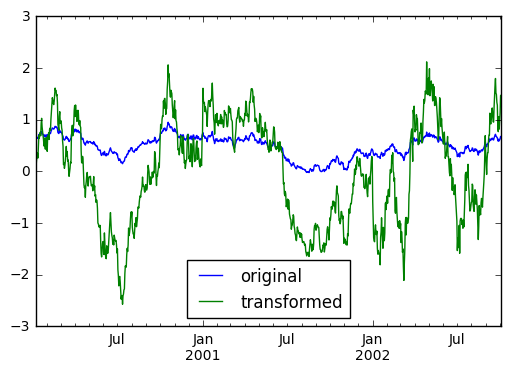

In [40]:
compare.plot()

In [41]:
#broadcasting output to match input array data
data_range = lambda x: x.max() - x.min()

In [42]:
ts.groupby(key).transform(data_range)

2000-01-08    0.801589
2000-01-09    0.801589
2000-01-10    0.801589
2000-01-11    0.801589
2000-01-12    0.801589
2000-01-13    0.801589
2000-01-14    0.801589
2000-01-15    0.801589
2000-01-16    0.801589
2000-01-17    0.801589
2000-01-18    0.801589
2000-01-19    0.801589
2000-01-20    0.801589
2000-01-21    0.801589
2000-01-22    0.801589
2000-01-23    0.801589
2000-01-24    0.801589
2000-01-25    0.801589
2000-01-26    0.801589
2000-01-27    0.801589
2000-01-28    0.801589
2000-01-29    0.801589
2000-01-30    0.801589
2000-01-31    0.801589
2000-02-01    0.801589
2000-02-02    0.801589
2000-02-03    0.801589
2000-02-04    0.801589
2000-02-05    0.801589
2000-02-06    0.801589
                ...   
2002-09-05    0.548573
2002-09-06    0.548573
2002-09-07    0.548573
2002-09-08    0.548573
2002-09-09    0.548573
2002-09-10    0.548573
2002-09-11    0.548573
2002-09-12    0.548573
2002-09-13    0.548573
2002-09-14    0.548573
2002-09-15    0.548573
2002-09-16    0.548573
2002-09-17 

In [45]:
#another common  transformation is to replace missing values
data_df = pd.DataFrame(np.random.randn(1000,3), columns=list('ABC'))

In [48]:
data_df.isnull().any()

A    False
B    False
C    False
dtype: bool

In [49]:
countries = np.array(['US','UK', 'GR', 'JP'])

In [51]:
key = countries[np.random.randint(0,4,1000)] #fill the characters with this length size

In [52]:
grouped = data_df.groupby(key)

In [53]:
grouped.count()

,A,B,C
GR,252,252,252
JP,274,274,274
UK,254,254,254
US,220,220,220


In [54]:
f = lambda x: x.fillna(x.mean())

In [55]:
transformed = grouped.transform(f)

In [56]:
grouped_trans = transformed.groupby(key)

In [57]:
grouped.mean()

,A,B,C
GR,-0.091772,0.160189,0.093281
JP,0.043042,0.038287,-0.077869
UK,0.025689,0.025761,0.044994
US,0.062354,0.059289,-0.010683


In [59]:
grouped_trans.mean() #same as the original group

,A,B,C
GR,-0.091772,0.160189,0.093281
JP,0.043042,0.038287,-0.077869
UK,0.025689,0.025761,0.044994
US,0.062354,0.059289,-0.010683


In [60]:
grouped.count()

,A,B,C
GR,252,252,252
JP,274,274,274
UK,254,254,254
US,220,220,220


In [61]:
grouped_trans.count()

,A,B,C
GR,252,252,252
JP,274,274,274
UK,254,254,254
US,220,220,220


In [62]:
grouped.size()

GR    252
JP    274
UK    254
US    220
dtype: int64

In [63]:
grouped_trans.size()

GR    252
JP    274
UK    254
US    220
dtype: int64

In [64]:
#doing this on windows, expanding and resampling operations
df_re = pd.DataFrame({'A' : [1] * 10 + [5] * 10, 
                      'B' : np.arange(20)}) ; df_re

,A,B
0,1,0
1,1,1
2,1,2
3,1,3
4,1,4
5,1,5
6,1,6
7,1,7
8,1,8
9,1,9


In [65]:
df_re.groupby('A').rolling(4).B.mean()

A    
1  0      NaN
   1      NaN
   2      NaN
   3      1.5
   4      2.5
   5      3.5
   6      4.5
   7      5.5
   8      6.5
   9      7.5
5  10     NaN
   11     NaN
   12     NaN
   13    11.5
   14    12.5
   15    13.5
   16    14.5
   17    15.5
   18    16.5
   19    17.5
Name: B, dtype: float64

In [66]:
df_re.groupby('A').expanding().sum()

A      B
A                
1 0    1.0    0.0
  1    2.0    1.0
  2    3.0    3.0
  3    4.0    6.0
  4    5.0   10.0
  5    6.0   15.0
  6    7.0   21.0
  7    8.0   28.0
  8    9.0   36.0
  9   10.0   45.0
5 10   5.0   10.0
  11  10.0   21.0
  12  15.0   33.0
  13  20.0   46.0
  14  25.0   60.0
  15  30.0   75.0
  16  35.0   91.0
  17  40.0  108.0
  18  45.0  126.0
  19  50.0  145.0

### Filtration

In [74]:
sf = pd.Series([1, 1, 2, 3, 3, 3])

In [75]:
sf.groupby(sf).filter(lambda x: x.sum() > 2)

3    3
4    3
5    3
dtype: int64

In [77]:
dff = pd.DataFrame({'A' : np.arange(8), 'B' : list('aabbbbcc')})

In [78]:
dff

,A,B
0,0,a
1,1,a
2,2,b
3,3,b
4,4,b
5,5,b
6,6,c
7,7,c


In [80]:
dff.groupby('B').filter(lambda x: len(x) > 2)

,A,B
2,2,b
3,3,b
4,4,b
5,5,b


In [79]:
dff.groupby('B').filter(lambda x: len(x) > 2, dropna = False)

,A,B
0,NaN,NaN
1,NaN,NaN
2,2.0,b
3,3.0,b
4,4.0,b
5,5.0,b
6,NaN,NaN
7,NaN,NaN


In [7]:
#Didpstching instance methods
grouped = df.groupby('A')

In [8]:
grouped.agg(lambda x: x.std())

,C,D
A,,
bar,1.322528,1.385050
foo,1.334971,0.366106


In [9]:
grouped.std()

,C,D
A,,
bar,1.322528,1.385050
foo,1.334971,0.366106


grouped.fillna(method='pad')

### nlargest and nsmallest methods

In [13]:
s = pd.Series([9,8,7,5,9,1,4.2,3.3])

In [14]:
g = pd.Series(list('abababab'))

In [15]:
gb = s.groupby(g)

In [17]:
gb.nlargest(3)

a  0    9.0
   4    9.0
   2    7.0
b  1    8.0
   3    5.0
   7    3.3
dtype: float64

In [18]:
gb.nsmallest(3)

a  6    4.2
   2    7.0
   0    9.0
b  5    1.0
   7    3.3
   3    5.0
dtype: float64

### Apply method

In [19]:
grouped = df.groupby('A')

In [20]:
grouped['C'].apply(lambda x: x.describe())

A         
bar  count    3.000000
     mean     0.695801
     std      1.322528
     min     -0.163606
     25%     -0.065664
     50%      0.032279
     75%      1.125505
     max      2.218731
foo  count    5.000000
     mean    -0.355560
     std      1.334971
     min     -2.017071
     25%     -0.878186
     50%     -0.555187
     75%      0.057276
     max      1.615366
Name: C, dtype: float64

In [21]:
grouped = df.groupby('A')['C']

In [22]:
def f(group):
    return pd.DataFrame({'original':group, 'demeaned': group-group.mean()})

In [23]:
grouped.apply(f)

,demeaned,original
0,-0.199626,-0.555187
1,-0.859407,-0.163606
2,0.412836,0.057276
3,-0.663523,0.032279
4,1.970927,1.615366
5,1.522930,2.218731
6,-1.661511,-2.017071
7,-0.522626,-0.878186
